You have an undirected, connected graph of n nodes labeled from 0 to n - 1. You are given an array graph where graph[i] is a list of all the nodes connected with node i by an edge.

Return the length of the shortest path that visits every node. You may start and stop at any node, you may revisit nodes multiple times, and you may reuse edges.

 

Example 1:

Input: graph = [[1,2,3],[0],[0],[0]]
Output: 4
Explanation: One possible path is [1,0,2,0,3]
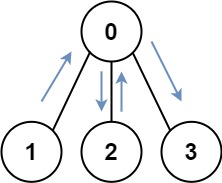

Example 2:

Input: graph = [[1],[0,2,4],[1,3,4],[2],[1,2]]
Output: 4
Explanation: One possible path is [0,1,4,2,3]

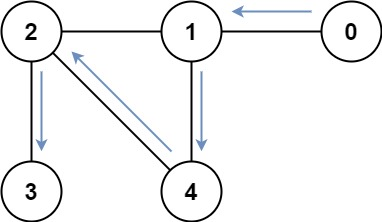
 

Constraints:

    n == graph.length
    1 <= n <= 12
    0 <= graph[i].length < n
    graph[i] does not contain i.
    If graph[a] contains b, then graph[b] contains a.
    The input graph is always connected.



In [2]:
from typing import List

class Solution:
    def shortestPathLength(self, graph: List[List[int]]) -> int:
        cache = {}
        def dfs(node, mask):
            state = (node, mask)
            # Base Case
            if state in cache:
                return cache[state]
            if mask & (mask - 1) == 0:
                return 0
            # Init cache[state] to infinity to avoid endless loop between two nodes
            cache[state] = float('inf')
            for neighbor in graph[node]:
                if mask & (1 << neighbor):
                    # If already visited currentNode mask doesn't change
                    visited = 1 + dfs(neighbor, mask)
                    # If not visited currentNode set mask = mask ^ (1 << node)
                    notVisited = 1 + dfs(neighbor, mask ^ (1 << node))
                    cache[state] = min(cache[state], visited, notVisited)
            return cache[state]
        
        endingMask = (1 << len(graph)) - 1
        cache = {}
        
        return min(dfs(node, endingMask) for node in range(len(graph)))

In [3]:
s = Solution()

s.shortestPathLength([[1,2,3],[0],[0],[0]])

4

In [4]:
s.shortestPathLength([[1],[0,2,4],[1,3,4],[2],[1,2]])

4